# Data Wrangling - We Rate Dogs

### Import Packages

In [2]:
# import packages
import pandas as pd
import requests
import numpy as np
import json
import tweepy
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Gather Data

In [3]:
# read csv file 
archive = pd.read_csv('twitter-archive-enhanced.csv')

archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1627,684594889858887680,NaN,NaN,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684594889...,10,10,None,None,None,None,None
1882,674999807681908736,6.747934e+17,4.196984e+09,2015-12-10 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ok last one of these. I may try to make some m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674999807...,13,10,None,None,None,None,None
2084,670807719151067136,NaN,NaN,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670807719...,11,10,Andy,None,None,None,None


In [327]:
# download image_predictions using requests

url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
image_pred.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
202,669683899023405056,https://pbs.twimg.com/media/CUsx8q_WUAA-m4k.jpg,1,Pomeranian,0.998275,True,Chihuahua,0.000605,True,Pekinese,0.000516,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
64,667171260800061440,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,1,giant_schnauzer,0.841265,True,Lakeland_terrier,0.052744,True,Irish_water_spaniel,0.034402,True


In [47]:
# get data using tweepy

# dev account secret keys
consumer_key = 'xxxxx'
consumer_secret = 'xxxxx' 
access_token = 'xx-xxx'
access_token_secret = 'xxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

# list of tweets available
df_list = []
# tweets unavailable
e_list = []
tweet_id = archive['tweet_id']


for id in tweet_id:
    try:
        page = api.get_status(id, tweet_mode='extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)})
    
    except Exception as e:
        e_list.append(id)

In [57]:
# save it in a file
tweet_count = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])
tweet_count.to_csv('tweet_json.txt', encoding = 'utf-8')

In [58]:
# sample of few rows
tweet_count.sample(3)

,tweet_id,favorites,retweet_count
187,855459453768019968,30529,8506
1556,687732144991551489,1852,700
1014,745789745784041472,4245,1146


### Assess Data

In [4]:
# copy data
archive_copy = archive.copy()
images_copy = image_pred.copy()
counts_copy = tweet_count.copy()

In [451]:
archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [452]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [453]:
archive_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [454]:
archive_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1579,687312378585812992,NaN,NaN,2016-01-13 16:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""You got any games on your phone"" 7/10 for invasive brown Dalmatian pupper https://t.co/yzGR9xjE9Q",NaN,NaN,NaN,https://twitter.com/dog_rates/status/687312378585812992/photo/1,7,10,None,None,None,pupper,None
581,800443802682937345,NaN,NaN,2016-11-20 21:00:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Sampson. He's about to get hit with a vicious draw 2. Has no idea. 11/10 poor pupper https://t.co/FYT9QBEnKG,7.761133e+17,4.196984e+09,2016-09-14 17:40:06 +0000,"https://twitter.com/dog_rates/status/776113305656188928/photo/1,https://twitter.com/dog_rates/status/776113305656188928/photo/1",11,10,Sampson,None,None,pupper,None
1487,693095443459342336,NaN,NaN,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Milo. He doesn't understand your fancy human gestures. Will lick instead. 10/10 can't faze this pupper https://t.co/OhodPIDOpW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693095443459342336/photo/1,10,10,Milo,None,None,pupper,None
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Good teamwork between these dogs. One is on lookout while other eats. Long necks. Nice big house. 9/10s good pups https://t.co/uXgmECGYEB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198282485761/photo/1,9,10,None,None,None,None,None
1408,699072405256409088,NaN,NaN,2016-02-15 03:27:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",ERMAHGERD 12/10 please enjoy https://t.co/7WrAWKdBac,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699072405256409088/video/1,12,10,None,None,None,None,None


In [455]:
images_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [456]:
images_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [457]:
images_copy.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [458]:
images_copy.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
961,705898680587526145,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,1,collie,0.808276,True,Border_collie,0.059437,True,groenendael,0.026720,True
237,670433248821026816,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,1,window_shade,0.583427,False,giant_schnauzer,0.062215,True,window_screen,0.039941,False
1390,766693177336135680,https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg,1,Doberman,0.948355,True,vizsla,0.015032,True,Rhodesian_ridgeback,0.009631,True
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/861288473281437696/pu/img/RERGmRgPyaaaB-tB.jpg,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
771,689517482558820352,https://pbs.twimg.com/media/CZGofjJW0AINjN9.jpg,1,Pembroke,0.799319,True,Cardigan,0.189537,True,papillon,0.003386,True


In [459]:
counts_copy

,tweet_id,favorites,retweet_count
0,892420643555336193,38160,8349
1,892177421306343426,32729,6171
2,891815181378084864,24639,4082
3,891689557279858688,41497,8486
4,891327558926688256,39671,9185
5,891087950875897856,19922,3055
6,890971913173991426,11643,2028
7,890729181411237888,64382,18531
8,890609185150312448,27366,4197
9,890240255349198849,31408,7252


In [460]:
counts_copy.describe()

,tweet_id,favorites,retweet_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422212e+17,7987.643894,2945.115713
std,6.832408e+16,12363.666145,4952.660149
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,1378.250000,591.500000
50%,7.186224e+17,3474.000000,1374.500000
75%,7.986971e+17,9785.750000,3434.750000
max,8.924206e+17,164715.000000,83935.000000


In [461]:
counts_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id         2342 non-null int64
favorites        2342 non-null int64
retweet_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [462]:
counts_copy.sample(5)

,tweet_id,favorites,retweet_count
103,871879754684805121,37599,11115
2048,671163268581498880,1693,1139
1532,689283819090870273,3457,1184
1866,675006312288268288,1012,236
1461,693642232151285760,2664,445


In [463]:
# check for unusual names
archive_copy.name.value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Oliver       11 
Lucy         11 
Tucker       10 
Lola         10 
Penny        10 
Winston      9  
Bo           9  
the          8  
Sadie        8  
Daisy        7  
Bailey       7  
Buddy        7  
an           7  
Toby         7  
Rusty        6  
Koda         6  
Stanley      6  
Dave         6  
Scout        6  
Jack         6  
Bella        6  
Leo          6  
Milo         6  
Oscar        6  
Jax          6  
Larry        5  
            ..  
Thor         1  
Iroh         1  
Stu          1  
Shnuggles    1  
such         1  
Rey          1  
Heinrich     1  
Jareld       1  
Jett         1  
Timber       1  
Evy          1  
Sweet        1  
Holly        1  
Chesney      1  
Edgar        1  
Snoopy       1  
Clybe        1  
Lupe         1  
Cora         1  
Tanner       1  
Major        1  
Malikai      1  
Snoop        1  
Pinot        1  
Strudel      1  
Skittle      1  
Rudy         1  
Moofasa      1

In [464]:
# name with str len less than or equal to 4
archive_copy.loc[archive_copy['name'].str.len() <= 4]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",13,10,Koda,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/889638837579907072/photo/1,https://twitter.com/dog_rates/status/889638837579907072/photo/1",12,10,Ted,None,None,None,None
16,888917238123831296,NaN,NaN,2017-07-23 00:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both https://t.co/chxruIOUJN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238123831296/photo/1,12,10,Jim,None,None,None,None
17,888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://tw

In [465]:
# names with str in lower case
archive_copy.name.str.lower()

0       phineas 
1       tilly   
2       archie  
3       darla   
4       franklin
5       none    
6       jax     
7       none    
8       zoey    
9       cassie  
10      koda    
11      bruno   
12      none    
13      ted     
14      stuart  
15      oliver  
16      jim     
17      zeke    
18      ralphus 
19      canela  
20      gerald  
21      jeffrey 
22      such    
23      canela  
24      none    
25      none    
26      maya    
27      mingus  
28      derek   
29      roscoe  
         ...    
2326    quite   
2327    a       
2328    none    
2329    none    
2330    none    
2331    none    
2332    none    
2333    an      
2334    a       
2335    an      
2336    none    
2337    none    
2338    none    
2339    none    
2340    none    
2341    none    
2342    none    
2343    none    
2344    none    
2345    the     
2346    the     
2347    a       
2348    a       
2349    an      
2350    a       
2351    none    
2352    a       
2353    a     

In [466]:
# rating_denominator values
archive_copy.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [467]:
# rating_numerator values
archive_copy.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [468]:
# source of tweets
archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [469]:
# check for duplicates
archive_copy.tweet_id.duplicated().any()

False

In [470]:
images_copy.tweet_id.duplicated().any()

False

In [471]:
counts_copy.tweet_id.duplicated().any()

False

### Quality

- Tables do not contain the same number of entries. This due to non-pictures and retweets included.
- Remove tweets without images.
- Remove tweets with retweet.
- Remove unnecessary columns.
- Convert non-dog names to 'None' then make title case.
- The rating_numerator and rating_denominator have offbeat values.
- Several columns have empty values, such as in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
- Convert timestamp to datetime.
- Change source column from ulr type to text.


### Tidiness

- Dog Stages into 1 column instead of 4.
- The prediction column of dog breed can be simplified.
- Join tweet_archive, image_prediction, tweet_json into one master dataset on tweetid.

## Clean

#### Define

#### Remove rows with 'retweeted_status_id' since we are interested in original tweets only.

#### Code

In [472]:
# droping rows which have values in retweet_status_x column
archive_copy.drop(archive_copy[archive_copy.retweeted_status_id.notnull()].index, inplace = True)

#### Test

In [473]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

Retweets have been removed as we have 0 non-null values for retweet_status_x.

#### Define

#### Remove unnecessary columns.

#### Code

In [474]:
# drop these below columns as they are nt necessary
archive_copy.drop(['retweeted_status_id',
                   'retweeted_status_user_id',
                   'retweeted_status_timestamp',
                   'in_reply_to_status_id',
                   'in_reply_to_user_id'], axis = 1, inplace = True)

#### Test

In [475]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Define

#### Combine dog stage columns (doggo, floofer, pupper, puppo) into one 'dog_stage' column. 

#### Code

In [476]:
# replace 'None' with ''

archive_copy.doggo.replace('None', '', inplace = True)
archive_copy.floofer.replace('None', '', inplace = True)
archive_copy.pupper.replace('None', '', inplace = True)
archive_copy.puppo.replace('None', '', inplace = True)

#create a new column 

archive_copy['dog_stage'] = archive_copy.doggo + archive_copy.floofer + archive_copy.pupper + archive_copy.puppo

archive_copy.dog_stage.value_counts()

                1831
pupper          224 
doggo           75  
puppo           24  
doggopupper     10  
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: dog_stage, dtype: int64

In [477]:
# rename dog_stage names
archive_copy.loc[archive_copy.dog_stage=='doggopupper','dog_stage']='Doggo, Pupper'
archive_copy.loc[archive_copy.dog_stage=='doggofloofer','dog_stage']='Doggo, Flooder'
archive_copy.loc[archive_copy.dog_stage=='doggopuppo','dog_stage']='Doggo, Puppo'


In [478]:
#replace blank cells with unknown
archive_copy.dog_stage.replace('','Unknown', inplace=True)
#replace nan with Unknown
archive_copy.dog_stage.value_counts()

Unknown           1831
pupper            224 
doggo             75  
puppo             24  
Doggo, Pupper     10  
floofer           9   
Doggo, Puppo      1   
Doggo, Flooder    1   
Name: dog_stage, dtype: int64

In [479]:
# drop the unnecessary columns
archive_copy.drop(['doggo','pupper','floofer','puppo'], axis=1,inplace=True)

#### Test

In [480]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


#### Define

#### Replace source links to string defining them

#### Code

In [481]:
archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [482]:
# create a dict of the source keys with it's values
source_text = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'Twitter for iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine - Make a Scene',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'
}

# function replaces key with values
def rename_source(df):
    if df['source'] in source_text.keys():
        abbreviation = source_text[df['source']]
        return abbreviation
    else:
        return df['source']
    
# function call    
archive_copy.source = archive_copy.apply(rename_source, axis=1)

#### Test

In [483]:
archive_copy.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

#### Define

#### Change Dog Ratings
- Change the rating_numerator and rating_denominator for oberservations with wrong value or drop them if necessary.
- Create new column rating=rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator.

#### Code

In [484]:
# compaing text with ratings 
pd.set_option('display.max_colwidth', -1)
archive_copy[archive_copy.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
313,835246439529840640,2017-02-24 21:54:03 +0000,Twitter for iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,Unknown
342,832088576586297345,2017-02-16 04:45:50 +0000,Twitter for iPhone,@docmisterio account started on 11/15/15,NaN,11,15,None,Unknown
433,820690176645140481,2017-01-15 17:52:40 +0000,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,Unknown
516,810984652412424192,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,Unknown
902,758467244762497024,2016-07-28 01:00:57 +0000,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,Unknown
1068,740373189193256964,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,Unknown
1120,731156023742988288,2016-05-13 16:15:54 +0000,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,Unknown
1165,722974582966214656,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,Unknown
1202,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,Unknown
1228,713900603437621249,2016-03-27 01:29:02 +0000,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,Unknown


In [485]:
archive_copy[archive_copy.rating_numerator >= 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
55,881633300179243008,2017-07-02 21:58:53 +0000,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,17,10,None,Unknown
188,855862651834028034,2017-04-22 19:15:32 +0000,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420,10,None,Unknown
189,855860136149123072,2017-04-22 19:05:32 +0000,Twitter for iPhone,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,666,10,None,Unknown
290,838150277551247360,2017-03-04 22:12:52 +0000,Twitter for iPhone,@markhoppus 182/10,NaN,182,10,None,Unknown
291,838085839343206401,2017-03-04 17:56:49 +0000,Twitter for iPhone,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,15,10,None,Unknown
313,835246439529840640,2017-02-24 21:54:03 +0000,Twitter for iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,Unknown
433,820690176645140481,2017-01-15 17:52:40 +0000,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,Unknown
516,810984652412424192,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,Unknown
695,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,Unknown
763,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,pupper


In [486]:
# replacing rating numerator and denominator which are wrong

archive_copy.loc[archive_copy.tweet_id==835246439529840640,['rating_numerator','rating_denominator']]=[13,10]
archive_copy.loc[archive_copy.tweet_id==740373189193256964,['rating_numerator','rating_denominator']]=[14,10]
archive_copy.loc[archive_copy.tweet_id==722974582966214656,['rating_numerator','rating_denominator']]=[13,10]
archive_copy.loc[archive_copy.tweet_id==716439118184652801,['rating_numerator','rating_denominator']]=[11,10]
archive_copy.loc[archive_copy.tweet_id==682962037429899265,['rating_numerator','rating_denominator']]=[10,10]
archive_copy.loc[archive_copy.tweet_id==666287406224695296,['rating_numerator','rating_denominator']]=[9,10]
archive_copy.loc[archive_copy.tweet_id==786709082849828864,['rating_numerator','rating_denominator']]=[10,10]
archive_copy.loc[archive_copy.tweet_id==778027034220126208,['rating_numerator','rating_denominator']]=[11,10]
archive_copy.loc[archive_copy.tweet_id==680494726643068929,['rating_numerator','rating_denominator']]=[11,10]


In [487]:
# check for any row with denominator 0

archive_copy[archive_copy.rating_denominator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [488]:
# drop tweet_id 810984652412424192 as it's rating is inaccurate
archive_copy=archive_copy[archive_copy.tweet_id!=810984652412424192]

In [489]:
# Create new column rating=rating_numerator/rating_denominator.
archive_copy['ratings'] = archive_copy.rating_numerator / archive_copy.rating_denominator

/home/bharat/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [490]:
# find ratings which are greater than 2 and fix them if possible or drop them
archive_copy.loc[archive_copy.ratings > 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings
188,855862651834028034,2017-04-22 19:15:32 +0000,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420,10,None,Unknown,42.0
189,855860136149123072,2017-04-22 19:05:32 +0000,Twitter for iPhone,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,666,10,None,Unknown,66.6
290,838150277551247360,2017-03-04 22:12:52 +0000,Twitter for iPhone,@markhoppus 182/10,NaN,182,10,None,Unknown,18.2
979,749981277374128128,2016-07-04 15:00:45 +0000,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,Unknown,177.6
2074,670842764863651840,2015-11-29 05:52:33 +0000,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,Unknown,42.0


In [491]:
# drop these above 5 rows which have unusal rating

index_n = archive_copy[archive_copy['ratings'] > 2].index
archive_copy.drop(index_n, inplace=True)

/home/bharat/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [492]:
archive_copy.loc[archive_copy.ratings > 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings


In [493]:
archive_copy.ratings.value_counts()

1.200000    504
1.000000    445
1.100000    434
1.300000    309
0.900000    157
0.800000    98 
0.700000    53 
1.400000    44 
0.500000    36 
0.600000    32 
0.300000    19 
0.400000    15 
0.200000    10 
0.100000    7  
0.000000    2  
1.700000    1  
0.733333    1  
1.250000    1  
1.500000    1  
Name: ratings, dtype: int64

In [494]:
# drop rating_num and denom columns

archive_copy.drop(['rating_numerator',
                  'rating_denominator'], axis = 1, inplace = True)

/home/bharat/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Test

In [495]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2169 non-null int64
timestamp        2169 non-null object
source           2169 non-null object
text             2169 non-null object
expanded_urls    2114 non-null object
name             2169 non-null object
dog_stage        2169 non-null object
ratings          2169 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 152.5+ KB


#### Define

#### Convert timestamp to datetime

#### Code

In [496]:
# convert timestamp to datetime

archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])

/home/bharat/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


#### Test

In [497]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2169 non-null int64
timestamp        2169 non-null datetime64[ns]
source           2169 non-null object
text             2169 non-null object
expanded_urls    2114 non-null object
name             2169 non-null object
dog_stage        2169 non-null object
ratings          2169 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 152.5+ KB


#### Define

#### Change unusal or non names to Unknown
- Replace names with None, a, an, the with unknown
- Make name title case

#### Code

In [5]:
# check for names
archive_copy.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
an            7
Toby          7
Bailey        7
Daisy         7
Buddy         7
Leo           6
Oscar         6
Rusty         6
Milo          6
Koda          6
Dave          6
Scout         6
Bella         6
Jack          6
Jax           6
Stanley       6
Oakley        5
           ... 
Holly         1
Spencer       1
Tedders       1
Anthony       1
Tripp         1
Chloe         1
Dixie         1
Kuyu          1
Kayla         1
Billy         1
his           1
Julius        1
Loomis        1
old           1
Blipson       1
Chase         1
Cheesy        1
Crawford      1
Hazel         1
Ulysses       1
Kirk          1
Emanuel       1
Durg          1
Ito           1
Eugene        1
Strudel       1
Tupawc        1
Goose         1
Steve         1
Lilah         1
Name: name, Length: 957,

In [499]:
# replace the non names with unknown
archive_copy.name.replace('None', 'Unknown', inplace = True)
archive_copy.name.replace('a', 'Unknown', inplace = True)
archive_copy.name.replace('an', 'Unknown', inplace = True)
archive_copy.name.replace('the', 'Unknown', inplace = True)
archive_copy.name.replace('none', 'Unknown', inplace = True)
archive_copy.name.replace('Such', 'Unknown', inplace = True)
archive_copy.name.replace('such', 'Unknown', inplace = True)

/home/bharat/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [500]:
# mak the name column Title case
archive_copy.name = archive_copy.name.str.title()

/home/bharat/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Test

In [501]:
archive_copy.name.value_counts()

Unknown    746
Lucy       11 
Charlie    11 
Cooper     10 
Oliver     10 
Penny      9  
Tucker     9  
Winston    8  
Lola       8  
Sadie      8  
Toby       7  
Daisy      7  
Jax        6  
Oscar      6  
Bella      6  
Bo         6  
Bailey     6  
Stanley    6  
Koda       6  
Leo        5  
Scout      5  
Bentley    5  
Rusty      5  
Milo       5  
Louis      5  
Dave       5  
Chester    5  
Buddy      5  
Duke       4  
Bear       4  
          ..  
Spencer    1  
Angel      1  
Brooks     1  
Cheesy     1  
Balto      1  
Steve      1  
Moofasa    1  
Nollie     1  
Stark      1  
Furzey     1  
Tilly      1  
Timber     1  
Evy        1  
Sweet      1  
Holly      1  
Chesney    1  
Edgar      1  
Snoopy     1  
Clybe      1  
Lupe       1  
Jett       1  
Cora       1  
Major      1  
Malikai    1  
Snoop      1  
Pinot      1  
Strudel    1  
Mingus     1  
Rudy       1  
Pawnd      1  
Name: name, Length: 952, dtype: int64

#### Define

#### Condense Dog breed Column by choosing the one which is true at first as the first column has the highest percentage than the next two

#### Code

In [502]:
# list of breeds
breed = []
# list of confidence of the prediction
confidence = []

# function to choose the breed which is true 
def choose_breed(df):
    if df['p1_dog'] == True:
        breed.append(df['p1'])
        confidence.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        breed.append(df['p2'])
        confidence.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        breed.append(df['p3'])
        confidence.append(df['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# function call        
images_copy.apply(choose_breed, axis=1)
# add the two columns
images_copy['breed'] = breed
images_copy['confidence'] = confidence
images_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


#### Test

In [503]:
# drop unnecessary columns

images_copy.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog',
                  'p3', 'p3_conf', 'p3_dog'], axis=1, inplace= True)

images_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


#### Define

#### Join tweet_archive, image_prediction, tweet_json into one master dataset on tweetid.

#### Code

In [504]:
twitter_archive_master = pd.merge(archive_copy, tweet_count, on='tweet_id', how='inner')

In [505]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 10 columns):
tweet_id         2168 non-null int64
timestamp        2168 non-null datetime64[ns]
source           2168 non-null object
text             2168 non-null object
expanded_urls    2113 non-null object
name             2168 non-null object
dog_stage        2168 non-null object
ratings          2168 non-null float64
favorites        2168 non-null int64
retweet_count    2168 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 186.3+ KB


In [506]:
twitter_archive_master = pd.merge(twitter_archive_master, images_copy, on='tweet_id', how='inner')

#### Test

In [507]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 13 columns):
tweet_id         1990 non-null int64
timestamp        1990 non-null datetime64[ns]
source           1990 non-null object
text             1990 non-null object
expanded_urls    1990 non-null object
name             1990 non-null object
dog_stage        1990 non-null object
ratings          1990 non-null float64
favorites        1990 non-null int64
retweet_count    1990 non-null int64
jpg_url          1990 non-null object
breed            1990 non-null object
confidence       1990 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 217.7+ KB


In [508]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,ratings,favorites,retweet_count,jpg_url,breed,confidence
254,832032802820481025,2017-02-16 01:04:13,Twitter for iPhone,This is Miguel. He was the only remaining doggo at the adoption center after the weekend. Let's change that. 12/10\n\nhttps://t.co/P0bO8mCQwN https://t.co/SU4K34NT4M,"https://www.petfinder.com/petdetail/34918210,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog_rates/status/832032802820481025/photo/1",Miguel,doggo,1.2,18830,5026,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,whippet,0.601712
831,734912297295085568,2016-05-24 01:02:00,Twitter for iPhone,This is Jax. He's a literal fluffball. Sneaky tongue slip. 10/10 would pet nonstop https://t.co/9MGouPwQmK,https://twitter.com/dog_rates/status/734912297295085568/photo/1,Jax,Unknown,1.0,2870,550,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,Maltese_dog,0.847292
120,863062471531167744,2017-05-12 16:05:02,Twitter for iPhone,Say hello to Quinn. She's quite the goofball. Not even a year old. Confirmed 13/10 but she really needs your help \n\nhttps://t.co/MOBkQnyHib https://t.co/EsOB4rLEKt,"https://www.gofundme.com/helpquinny,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1",Quinn,Unknown,1.3,8575,2487,https://pbs.twimg.com/media/C_o2vKCUwAAgtOp.jpg,French_bulldog,0.935804
1689,671511350426865664,2015-12-01 02:09:16,Twitter for iPhone,Say hello to Hammond. He's just a wee lil pup. Jumps around a shit ton. 8/10 overall very good dog https://t.co/OgDF2ES3Q9,https://twitter.com/dog_rates/status/671511350426865664/photo/1,Hammond,Unknown,0.8,1640,747,https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg,Unknown,0.000000
1084,700505138482569216,2016-02-19 02:20:14,Twitter for iPhone,This is Kaia. She's just cute as hell. 12/10 I'd kill for Kaia https://t.co/5fMdH8GFaq,"https://twitter.com/dog_rates/status/700505138482569216/photo/1,https://twitter.com/dog_rates/status/700505138482569216/photo/1,https://twitter.com/dog_rates/status/700505138482569216/photo/1,https://twitter.com/dog_rates/status/700505138482569216/photo/1",Kaia,Unknown,1.2,2397,610,https://pbs.twimg.com/media/Cbixs3vUUAAqHHN.jpg,Norwegian_elkhound,0.160205


#### Save the master dataframe to csv file.

In [509]:
# save to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index= False)

### Analysis and Visualize Data

#### Basic Statistics

In [510]:
# basic statistics
twitter_archive_master.describe()

,tweet_id,ratings,favorites,retweet_count,confidence
count,1.990000e+03,1990.000000,1990.000000,1990.000000,1990.000000
mean,7.358295e+17,1.055377,8755.149749,2661.836683,0.465186
std,6.750725e+16,0.217853,12839.534467,4745.382038,0.339355
min,6.660209e+17,0.000000,80.000000,12.000000,0.000000
25%,6.758475e+17,1.000000,1881.250000,594.250000,0.140826
50%,7.084132e+17,1.100000,3944.000000,1276.500000,0.459130
75%,7.877873e+17,1.200000,10918.250000,3050.250000,0.776387
max,8.924206e+17,1.400000,164715.000000,83935.000000,0.999956


In [511]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 13 columns):
tweet_id         1990 non-null int64
timestamp        1990 non-null datetime64[ns]
source           1990 non-null object
text             1990 non-null object
expanded_urls    1990 non-null object
name             1990 non-null object
dog_stage        1990 non-null object
ratings          1990 non-null float64
favorites        1990 non-null int64
retweet_count    1990 non-null int64
jpg_url          1990 non-null object
breed            1990 non-null object
confidence       1990 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 217.7+ KB


#### Distribution of Source 

Text(0,0.5,'Source')

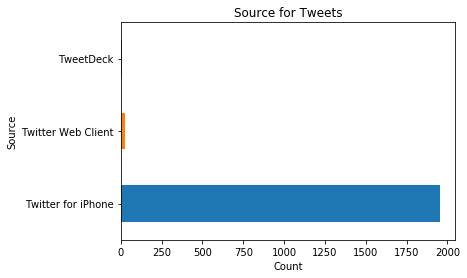

In [533]:
# Plot Distribution of Source 
twitter_archive_master.source.value_counts().plot(kind = 'barh')
plt.title('Source for Tweets')
plt.xlabel('Count')
plt.ylabel('Source')

In [513]:
# find the actual count
twitter_archive_master.source.value_counts()

Twitter for iPhone    1952
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

Most of the tweets over 90% of them are sent via iPhone, next by Web and very few by TweetDeck 

#### Statistics of Dog Stage and Ratings

In [514]:
twitter_archive_master.groupby('dog_stage')['ratings'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
"Doggo, Flooder",1.0,1.100000,NaN,1.1,1.100,1.1,1.1,1.1
"Doggo, Pupper",9.0,1.100000,0.239792,0.5,1.100,1.2,1.2,1.3
"Doggo, Puppo",1.0,1.300000,NaN,1.3,1.300,1.3,1.3,1.3
Unknown,1684.0,1.046496,0.223632,0.0,1.000,1.1,1.2,1.4
doggo,63.0,1.188889,0.147135,0.8,1.100,1.2,1.3,1.4
floofer,7.0,1.200000,0.115470,1.0,1.150,1.2,1.3,1.3
pupper,203.0,1.063547,0.172779,0.3,1.000,1.1,1.2,1.4
puppo,22.0,1.200000,0.130931,0.9,1.125,1.2,1.3,1.4


#### Distribution of Ratings

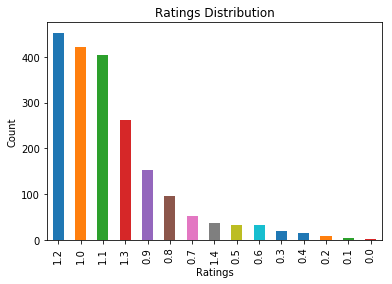

In [538]:
#plot distribution of ratings
twitter_archive_master.ratings.value_counts().plot(kind = 'bar')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count');

If we ignore the Unknown dog stage, then pupper has the minimum rating with 0.3 
and Doogo Puppo has the minimum highest rating with 1.3
Over 1684 dog's stage out of 1990 are unknown. 
11 Dog's stage is mixed i.e combination of 2

#### Most Common name

In [516]:
# most common name

twitter_archive_master.name.value_counts().head(10)

Unknown    614
Lucy       10 
Cooper     10 
Charlie    10 
Oliver     10 
Penny      9  
Tucker     9  
Sadie      8  
Winston    8  
Daisy      7  
Name: name, dtype: int64

Lucy, cooper, Charlie and Oliver are the most common names.
Over 614 dogs name are unknown

#### Top Dogs with most Favorite count

In [524]:
# top favorited dog

twitter_archive_master.sort_values(by=['favorites'], ascending=False).head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,ratings,favorites,retweet_count,jpg_url,breed,confidence
772,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,Unknown,doggo,1.3,164715,83935,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever,0.825333
309,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,Unknown,puppo,1.3,140814,47876,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015
399,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,Stephan,Unknown,1.3,127397,61169,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,0.505370


All the Top 3 dogs by favorite count has higher rating of 1.3

#### Top Dogs with most Retweet count

In [526]:
# top dogs by retweets
twitter_archive_master.sort_values(by=['retweet_count'], ascending=False).head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,ratings,favorites,retweet_count,jpg_url,breed,confidence
772,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,Unknown,doggo,1.3,164715,83935,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever,0.825333
807,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,Unknown,doggo,1.3,121717,62197,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,Eskimo_dog,0.503372
399,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,Stephan,Unknown,1.3,127397,61169,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,0.505370


The top most dog with higher number of retweet counts also stands first when it comes to favorite counts.
All of these top dogs have a higher rating.

#### Dog Stage Distribution

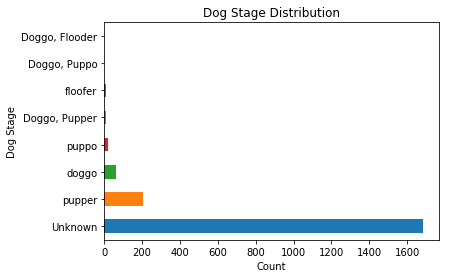

In [540]:
# Plot Most number of Dog stage
twitter_archive_master.dog_stage.value_counts().plot(kind = 'barh')
plt.title('Dog Stage Distribution')
plt.xlabel('Count')
plt.ylabel('Dog Stage');

#### Relation between Favorite and Retweet count

/home/bharat/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


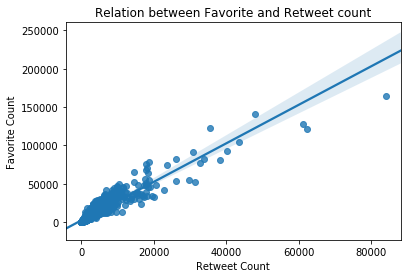

In [542]:
# Plot Relation between Favorite and Retweet count

sns.regplot(x = 'retweet_count', y = 'favorites', data = twitter_archive_master)
plt.title('Relation between Favorite and Retweet count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

There is a positive correlation between number of retweets and favorite count.
The more the post id retweeted the more eyes on it and the more favorites.

### Insights

- Most of the tweets over 90% of them are sent via iPhone, next by Web and very few by TweetDeck.
- The mean of ratings is 1.055377, common ratings are 1.2, 1.3, 1.0 
- If we ignore the Unknown dog stage, then pupper has the minimum rating with 0.3 and Doogo Puppo has the minimum highest rating with 1.3 Over 1684 dog's stage out of 1990 are unknown. 11 Dog's stage is mixed i.e combination of 2.
- Lucy, cooper, Charlie and Oliver are the most common names. Over 614 dogs name are unknown.
- Top dogs with higher favorite count and retweet count has a higher rating of 1.3 or 1.4.
- Among the Dog stages, pupper has the highest frequency, but has the least minimum ratings with 0.3.
- There is a positive correlation between number of retweets and favorite count. The more the post id retweeted the more eyes on it and the more favorites.